# Local and Global Optimization techniques

### Outline
1. Hill Climbing
2. Simulated Annealing
3. Genetic Algorithm

### 1. Hill Climbing

In [2]:
# Problem: 
# Given a unit hypercube, find a node with a maximum value
# of the function defined on the coordinates of the node.
# Ex: if node=(1,0,0,1,1,0), then f(node)=val - some value

# evaluate the function value at node x
def eval_hcube_node(x):
    p = 149 # some prime number
    n = len(x)
    val = 0
    if n>1:
        # compute the value of the function
        for i in range(n):
           val += x[n-i-1] * pow(2, 2*i) 
           #val += x[i] 
            
    return val % p

# get all the neighbours of the node x
def get_hcube_neighbours(x):
    neighbours = []
    n = len(x)
    if n>1:
        for i in range(n): 
            nd = list(x)
            nd[i] = (nd[i]+1) % 2
            neighbours.append(tuple(nd))
    return neighbours

In [22]:
# test hypercube functions
import numpy as np

x = (1,1,0,1,0,0,0,1)
u = get_hcube_neighbours(x)
vals = []
for i in range(len(x)):
    print(u[i], eval_hcube_node(u[i]))
    vals.append(eval_hcube_node(u[i]))
k = np.argmax(vals)
print("Max: ",k, u[k], eval_hcube_node(u[k]))

(0, 1, 0, 1, 0, 0, 0, 1) 32
(1, 0, 0, 1, 0, 0, 0, 1) 102
(1, 1, 1, 1, 0, 0, 0, 1) 7
(1, 1, 0, 0, 0, 0, 0, 1) 68
(1, 1, 0, 1, 1, 0, 0, 1) 90
(1, 1, 0, 1, 0, 1, 0, 1) 42
(1, 1, 0, 1, 0, 0, 1, 1) 30
(1, 1, 0, 1, 0, 0, 0, 0) 25
Max:  1 (1, 0, 0, 1, 0, 0, 0, 1) 102


In [23]:
# Exhaustive search using BFS algorithm

import numpy as np

nd_cur = (0,0,0,1,0,0,0,0)

n = len(nd_cur)
move = 0
visited = set()
Q = []
Q.append(nd_cur)
max_val = -1
max_nd = nd_cur

while Q:
    # count the number of moves
    move += 1

    # get current
    nd_cur = Q.pop(0)
    visited.add(nd_cur)

    # update max value and max node
    if (max_val < eval_hcube_node( nd_cur )):
        max_val = eval_hcube_node( nd_cur )
        max_nd = nd_cur
    
    # get the neighbours of the current node
    neighbours = get_hcube_neighbours(nd_cur)

    # compute max function values among the neighbours
    for nd in neighbours:
        if (nd not in visited) and (nd not in Q):
           Q.append(nd)

# Run the algorithm
print("Max after move {0}: node - {1}, val - {2}".format(move, max_nd, max_val))    

Max after move 256: node - (1, 0, 0, 0, 0, 0, 1, 1), val - 148


In [4]:
# Hill climbing algorithm

import numpy as np

nd_cur = (0,0,0,1,0,0,0,0)
n = len(nd_cur)
move = 0
while True:
    # count the number of moves
    move += 1
    print("nd_cur:",nd_cur, eval_hcube_node( nd_cur ))

    # get the neighbours of the current node
    neighbours = get_hcube_neighbours(nd_cur)

    # compute max function values among the neighbours
    vals = []
    for i in range(len(neighbours)):
        vals.append(eval_hcube_node(neighbours[i]))
        print("neighbour:",neighbours[i], eval_hcube_node( neighbours[i] ))
    k = np.argmax(vals)

    # exit if no neighbour has greater value than current value 
    if eval_hcube_node( neighbours[k] ) <=  eval_hcube_node( nd_cur ):
        print("========================================")
        break

    # select the neighbour with the greatest value
    nd_cur = neighbours[k]
    print("----------------------------------------")

# Run the algorithm
print("Max after move {0}: node - {1}, val - {2}".format(move, nd_cur, eval_hcube_node(nd_cur))) 

nd_cur: (0, 0, 0, 1, 0, 0, 0, 0) 107
neighbour: (1, 0, 0, 1, 0, 0, 0, 0) 101
neighbour: (0, 1, 0, 1, 0, 0, 0, 0) 31
neighbour: (0, 0, 1, 1, 0, 0, 0, 0) 88
neighbour: (0, 0, 0, 0, 0, 0, 0, 0) 0
neighbour: (0, 0, 0, 1, 1, 0, 0, 0) 22
neighbour: (0, 0, 0, 1, 0, 1, 0, 0) 123
neighbour: (0, 0, 0, 1, 0, 0, 1, 0) 111
neighbour: (0, 0, 0, 1, 0, 0, 0, 1) 108
----------------------------------------
nd_cur: (0, 0, 0, 1, 0, 1, 0, 0) 123
neighbour: (1, 0, 0, 1, 0, 1, 0, 0) 117
neighbour: (0, 1, 0, 1, 0, 1, 0, 0) 47
neighbour: (0, 0, 1, 1, 0, 1, 0, 0) 104
neighbour: (0, 0, 0, 0, 0, 1, 0, 0) 16
neighbour: (0, 0, 0, 1, 1, 1, 0, 0) 38
neighbour: (0, 0, 0, 1, 0, 0, 0, 0) 107
neighbour: (0, 0, 0, 1, 0, 1, 1, 0) 127
neighbour: (0, 0, 0, 1, 0, 1, 0, 1) 124
----------------------------------------
nd_cur: (0, 0, 0, 1, 0, 1, 1, 0) 127
neighbour: (1, 0, 0, 1, 0, 1, 1, 0) 121
neighbour: (0, 1, 0, 1, 0, 1, 1, 0) 51
neighbour: (0, 0, 1, 1, 0, 1, 1, 0) 108
neighbour: (0, 0, 0, 0, 0, 1, 1, 0) 20
neighbour: (0, 0,

### 2. Simulated Annealing

In [25]:
# TODO: Define a problem

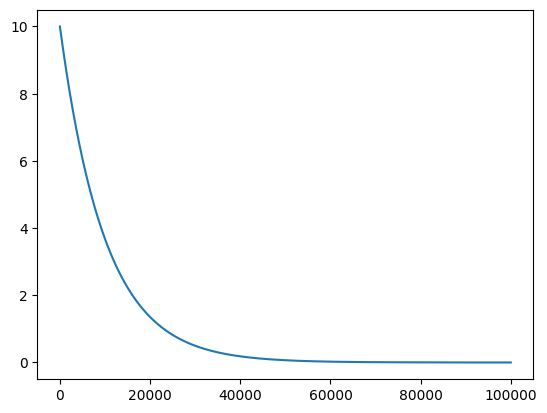

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# temperature function
def temperature(t):
    A = 10
    lam = 0.0001
    return A * np.exp(-lam*t)

# draw the ttemperature function
X = np.array(list(range(100000)))
Y = temperature(X)
plt.plot(X, Y)
plt.show()

In [54]:
# setup a probability function
import numpy as np

def probability(E_cur, E_new, T):
    eps = 1e-43
    if T < eps:
        print("T is small", T)
        return 0
    else:
        if E_cur < E_new:
            return 1
        else:
            d = E_cur - E_new
            return np.exp(-d/T)

In [55]:
### Pseudocode from Wikipedia
# Let s = s0
# For k = 0 through kmax (exclusive):
#   T ← temperature( 1 - (k+1)/kmax )
#   Pick a random neighbour, snew ← neighbour(s)
#   If P(E(s), E(snew), T) ≥ random(0, 1):
#      s ← snew
# Output: the final state s

import sys
import numpy as np
import random as rnd

rnd.seed(1000)

nd_cur = (1,0,0,0,0,1,0)
move = 0
#Kmax = sys.maxsize
Kmax = 1000000
for k in range(Kmax):
    # count the number of moves
    move += 1    
    
    # set the temperature
    T = temperature(k)

    # get the neighbours of the current node
    neighbours = get_hcube_neighbours(nd_cur)

    # pick a random neigbour
    n = len(neighbours)
    i = rnd.randint(0, n-1)
    nd_new = neighbours[i]

    # select this neighbour if P(Ecur,Enew,T) > random number
    val_cur = eval_hcube_node(nd_cur)
    val_new = eval_hcube_node(nd_new)
    if probability(val_cur, val_new, T) > rnd.random():
        nd_cur = nd_new

print("T:", T)

# Run the algorithm
print("Max after move {0}: node - {1}, val={2}, T={3}".format(move, nd_cur, eval_hcube_node(nd_cur),T))

T: 3.7204480022193976e-43
Max after move 1000000: node - (1, 0, 0, 1, 0, 1, 1), val=142, T=3.7204480022193976e-43


### 3. Genetic Algorithm

In [ ]:
# TODO: Define a problem

In [168]:
## Source: https://github.com/aimacode/aima-python/blob/master/search.py

import random

# Perform search using Genetic algorithm
def genetic_algorithm(population_size, gene_pool, parents_ratio, mutation_prob, max_iter):
    # best node and fitness
    best_fit = -1
    best_node = None

    # initial population
    pop = init_population(population_size, [0,1], 8)

    for i in range(max_iter):
        # sort the instances by fitness
        pop = sorted(pop, key=fitness, reverse=True)

        # check for best node and fitness
        if fitness(pop[0]) > best_fit:
            best_node = pop[0]
            best_fit = fitness(pop[0])

        # select parents and start breeding
        children = []
        parents = select_parents(pop, parents_ratio)
        p = int(len(parents)/2)
        for i in range(p):
            #choose parents
            p1 = parents[i]
            p2 = parents[p+i]
            
            # breed and mutate the child
            child = mutate(crossover(p1, p2), gene_pool, mutation_prob)
            children.append(child)

        # create new population
        pop = select_population(pop, children)

    return best_node, best_fit

# Initialize population
def init_population(pop_number, gene_pool, state_length):
    """Initializes population for genetic algorithm
    pop_number  :  Number of individuals in population
    gene_pool   :  List of possible values for individuals
    state_length:  The length of each individual"""
    g = len(gene_pool)
    population = []
    for i in range(pop_number):
        new_individual = [gene_pool[random.randrange(0, g)] for j in range(state_length)]
        population.append(new_individual)

    return population

# Fitness function:
# returns the value at a hypercube node x
def fitness(x):
    return eval_hcube_node(x)
    
# Select parents for breeding:
# k - ratio of the parents to be selected
def select_parents(pop, k):
    # sort the instances by fitness
    pop_sorted = sorted(pop, key=fitness, reverse=True)
    
    n = len(pop)
    parents = pop_sorted[0 : int(k*n)]
    return parents 

# Crossover function:
# takes two parents and returns a new child
def crossover(x, y):
    n = len(x)
    c = random.randrange(0, n)
    return x[:c] + y[c:]

# Mutation function:
# changes one bit of the sample x
def mutate(x, gene_pool, pmut):
    prob = random.uniform(0, 1)
    if prob >= pmut:
        return x

    n = len(x)
    g = len(gene_pool)
    c = random.randrange(0, n)
    r = random.randrange(0, g)
    new_gene = gene_pool[r]
    
    return x[:c] + [new_gene] + x[c + 1:]

# Selection function:
# pop - population, k - ratio of selected instance
def select_population(pop, children):
    # sort the instances by fitness
    pop_sorted = sorted(pop, key=fitness, reverse=True)

    # create new generation by replacing the current
    # population's tail with new children
    n = len(pop)
    k = len(children)
    new_pop = pop_sorted[0: n-k] + children
    
    return new_pop

In [178]:
P = init_population(8, [0,1], 8)
children = [
    [1, 0, 1, 0, 1, 0, 1, 1],
    [1, 0, 1, 0, 1, 1, 1, 0],
    [1, 0, 1, 1, 1, 0, 1, 0],
    [1, 1, 1, 0, 1, 0, 1, 0],
]
for p in select_population(P, children ):
    print(p, fitness(p))

[0, 0, 0, 1, 0, 1, 1, 1] 128
[1, 0, 1, 1, 0, 1, 0, 0] 98
[0, 1, 0, 0, 0, 1, 0, 0] 89
[1, 0, 1, 1, 0, 0, 0, 0] 82
[1, 0, 1, 0, 1, 0, 1, 1] 44
[1, 0, 1, 0, 1, 1, 1, 0] 59
[1, 0, 1, 1, 1, 0, 1, 0] 1
[1, 1, 1, 0, 1, 0, 1, 0] 116


In [182]:
for i in range(10):
    x = [1, 0, 1, 0, 1, 0, 1, 0]
    y = mutate(x, [0,1], 0.8)
    print(y)

[1, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 1, 0, 1, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 1, 0, 1, 0, 1, 1]


In [214]:
# run the genetic algorithm
population_size = 16
gene_pool = [0,1]
parents_ratio = 0.5
mutation_prob = 0.1
max_iter = 1000
x,y = genetic_algorithm(
            population_size, 
            gene_pool, 
            parents_ratio, 
            mutation_prob, 
            max_iter)
print(x,y)

[1, 0, 0, 0, 0, 0, 1, 1] 148
